In [92]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import math
from math import sqrt

In [93]:
!pip install pandas

In [94]:
df=pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
df.head(10)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [95]:
df['TAIL_NUM'].unique()

array(['N828JB', 'N992JB', 'N959JB', ..., 'N316NB', 'N976NN', 'N217JQ'],
      dtype=object)

In [96]:
from sklearn import preprocessing

In [97]:
label_encoder = preprocessing.LabelEncoder()

In [98]:
df['TAIL_NUM']= label_encoder.fit_transform(df['TAIL_NUM'])
  
df['TAIL_NUM'].unique()
df.head(20)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,1405,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,2074,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,1942,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,2091,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,1583,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,2041,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,21,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,331,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,1111,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,350,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [99]:
df['OP_UNIQUE_CARRIER'].unique()

array(['B6', 'DL', 'AA', 'AS', 'MQ', '9E', 'YX', 'HA', 'OO'], dtype=object)

In [100]:
df['OP_UNIQUE_CARRIER']= label_encoder.fit_transform(df['OP_UNIQUE_CARRIER'])
  
df['OP_UNIQUE_CARRIER'].unique()
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,3,2074,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,3,1942,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,3,2091,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,4,1583,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [101]:
df['DEST'].unique()

array(['CHS', 'LAX', 'FLL', 'MCO', 'ATL', 'ORD', 'BUF', 'LGB', 'LAS',
       'DCA', 'PHX', 'SFO', 'SJU', 'SLC', 'BOS', 'SAV', 'SYR', 'MSP',
       'SEA', 'MIA', 'PDX', 'TPA', 'BTV', 'IAH', 'DEN', 'RSW', 'ORF',
       'JAX', 'MSY', 'CLT', 'BNA', 'RDU', 'SAN', 'SJC', 'ROC', 'DFW',
       'IAD', 'AUS', 'DTW', 'PWM', 'SRQ', 'CMH', 'HNL', 'PBI', 'BWI',
       'CLE', 'BUR', 'PIT', 'RIC', 'IND', 'CVG', 'SMF', 'ONT', 'SAT',
       'PSP', 'OAK', 'ABQ', 'PSE', 'ORH', 'BQN', 'STT', 'RNO', 'PHL',
       'EGE', 'JAC'], dtype=object)

In [102]:
df['DEST']= label_encoder.fit_transform(df['DEST'])
  
df['DEST'].unique()
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [103]:
df['Wind'].unique()

array(['W', 'WNW', 'NW', 'NNW', 'S', 'ENE', 'NE', 'NNE', 'E', 'SE',
       'CALM', 'SW', 'VAR', 'SSE', 'SSW', 'WSW', 'N', 'ESE', nan],
      dtype=object)

In [104]:
df['Wind']= label_encoder.fit_transform(df['Wind'].astype(str)).astype(str)
  
df['Wind'].unique()
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,34,58,15,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,34,58,15,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,34,58,15,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,34,58,15,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,32,58,15,24,35,29.91,Fair / Windy,9,17,13


In [105]:
df['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

In [106]:
df['Condition']= label_encoder.fit_transform(df['Condition'])
  
df['Condition'].unique()
df.head(5)
X=df.drop('TAXI_OUT',1)
Y=df['TAXI_OUT']

In [107]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
x=np.empty(7,dtype=float)

(25938, 22) (2882, 22) (25938,) (2882,)


In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [120]:
neigh=KNeighborsRegressor(n_neighbors=500)
neigh.fit(X_train,Y_train)
y=neigh.predict(X_test)
x[0]=sqrt(mean_squared_error(Y_test,y))
print(x[0])

6.6592306433979935


In [111]:
from sklearn.linear_model import LinearRegression 

In [121]:
linear=LinearRegression()
linear.fit(X_train,Y_train)
y=linear.predict(X_test)
x[1]=sqrt(mean_squared_error(Y_test,y))
print(x[1])

6.433041588374646


In [113]:
from sklearn.linear_model import Lasso

In [122]:
lasso=Lasso(alpha=0.05,normalize=True)
lasso.fit(X_train,Y_train)
y=lasso.predict(X_test)
x[2]=sqrt(mean_squared_error(Y_test,y))
print(x[2])

6.778723024060612


In [115]:
from sklearn.linear_model import Ridge

In [123]:
ridge=Ridge(alpha=0.05,normalize=True)
ridge.fit(X_train,Y_train)
y=ridge.predict(X_test)
x[3]=sqrt(mean_squared_error(Y_test,y))
print(x[3])

6.450302722023864


In [124]:
from sklearn.linear_model import BayesianRidge

In [125]:
bayes=BayesianRidge()
bayes.fit(X_train,Y_train)
y=bayes.predict(X_test)
x[4]=sqrt(mean_squared_error(Y_test,y))
print(x[4])

6.434619233430696


In [126]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [127]:
svm1=StandardScaler()
svm2=StandardScaler()
copy1=X_train.copy()
copy2=X_test.copy()
copy1=svm1.fit_transform(copy1)
copy2=svm2.fit_transform(copy2)
s=SVR()
s.fit(copy1,Y_train)
y=s.predict(copy2)
x[5]=sqrt(mean_squared_error(Y_test,y))
print(x[5])

6.200562643049265


In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
y=forest.predict(X_test)
x[6]=sqrt(mean_squared_error(Y_test,y))
print(x[6])

5.612246866050725


In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_enco=LabelEncoder()

X1=df.drop('TAXI_OUT',axis=1)
Y1=df['TAXI_OUT']
X1=pd.get_dummies(X1,columns=['MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','DEST'])
df['TAIL_NUM']=label_enco.fit_transform(X1['TAIL_NUM']).astype(str)
df['Wind']=label_enco.fit_transform(df['Wind']).astype(str)
df['Condition']=label_enco.fit_transform(df['Condition']).astype(str)

In [131]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.10,random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

a=np.empty(7,dtype=float)

(25938, 22) (2882, 22) (25938,) (2882,)


In [132]:
neigh1=KNeighborsRegressor(n_neighbors=500)
neigh1.fit(X1_train,Y1_train)
b=neigh1.predict(X1_test)
a[0]=sqrt(mean_squared_error(Y1_test,b))
print(a[0])

6.712984868488264


In [133]:
linear1=LinearRegression()
linear1.fit(X1_train,Y1_train)
b=linear1.predict(X1_test)
a[1]=sqrt(mean_squared_error(Y1_test,b))
print(a[1])

6.328934230536237


In [134]:
lasso1=Lasso(alpha=0.05,normalize=True)
lasso1.fit(X1_train,Y1_train)
b=lasso1.predict(X1_test)
a[2]=sqrt(mean_squared_error(Y1_test,b))
print(a[2])

6.832364662675594


In [135]:
ridge1=Ridge(alpha=0.05,normalize=True)
ridge1.fit(X1_train,Y1_train)
b=ridge1.predict(X1_test)
a[3]=sqrt(mean_squared_error(Y1_test,b))
print(a[3])

6.338223294319978


In [136]:
bayes1=BayesianRidge()
bayes1.fit(X1_train,Y1_train)
b=bayes1.predict(X1_test)
a[4]=sqrt(mean_squared_error(Y_test,b))
print(a[4])

7.332505616656257


In [137]:
svm11=StandardScaler()
svm12=StandardScaler()
copy11=X1_train.copy()
copy12=X1_test.copy()
copy11=svm11.fit_transform(copy11)
copy12=svm12.fit_transform(copy12)
s=SVR()
s.fit(copy11,Y1_train)
b=s.predict(copy12)
a[5]=sqrt(mean_squared_error(Y1_test,b))
print(a[5])

6.301471736032194


In [138]:
forest1=RandomForestRegressor()
forest1.fit(X_train,Y_train)
y=forest1.predict(X_test)
a[6]=sqrt(mean_squared_error(Y_test,y))
print(a[6])

5.592927057213814


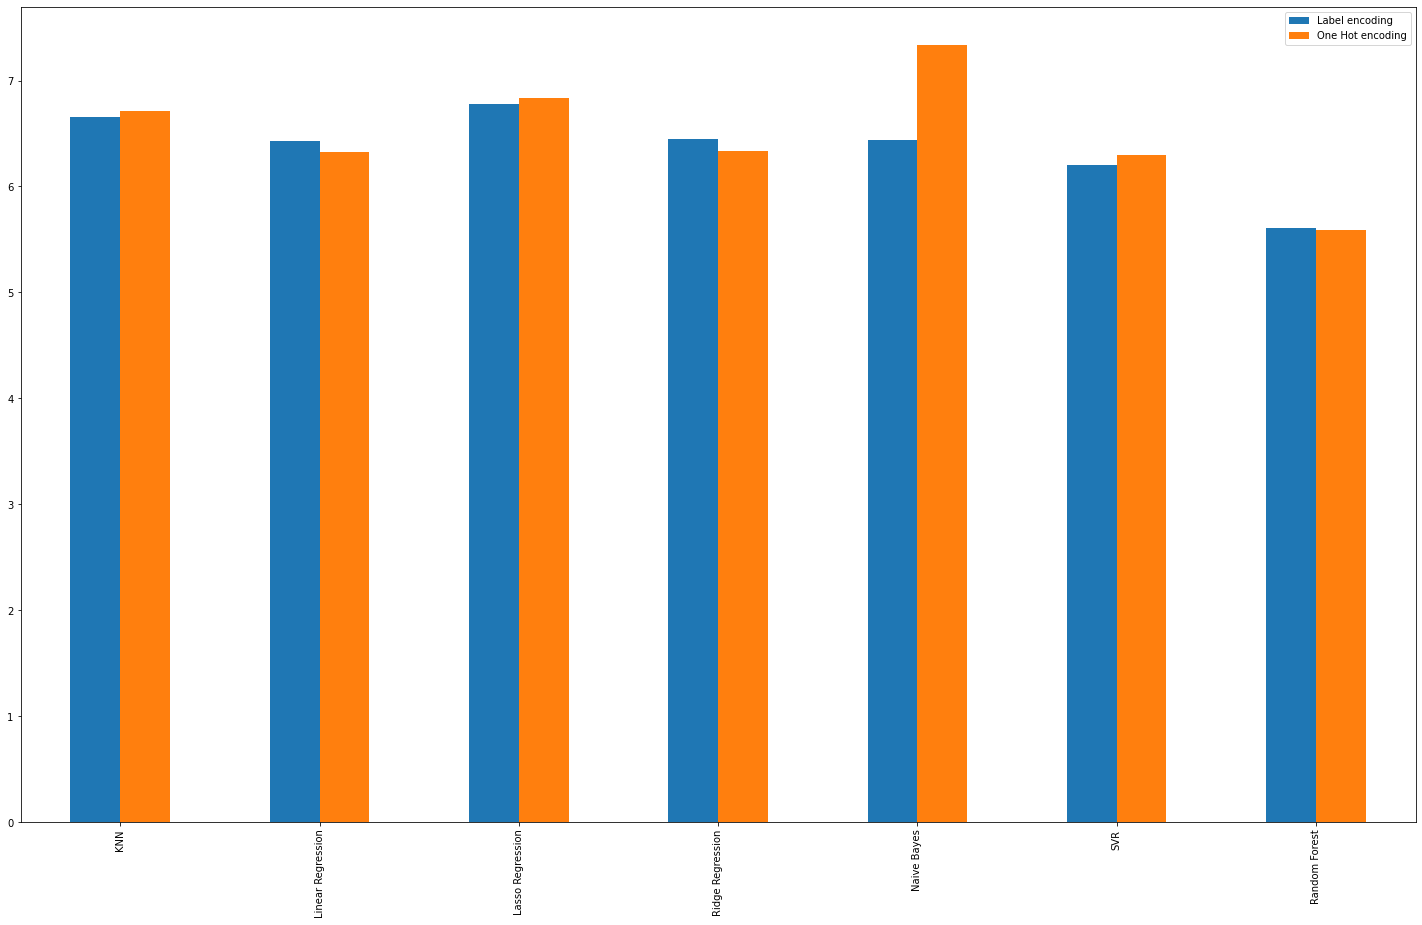

In [142]:
labels=['KNN','Linear Regression','Lasso Regression','Ridge Regression','Naive Bayes','SVR','Random Forest']
df = pd.DataFrame({'Label encoding':x,'One Hot encoding':a}, index=labels)
ax = df.plot.bar(figsize=(25,15))